In [19]:
# imports
import pandas as pd
import numpy as np
from label_utils import *
from ModelTester import ModelTester
from sklearn.metrics import confusion_matrix

%load_ext autoreload
%autoreload 2


# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading in the data

In [2]:
data = pd.read_csv("merged_data_ver_1.1.csv", index_col=0)
data.head()

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,country,league,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribbling,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribbling,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.30,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.00,1.73,3.40,4.2,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
1,1,1,1.75,3.50,4.33,1.80,3.40,3.95,1.70,3.3,4.0,1.72,3.40,4.00,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.4,4.0,1.80,3.3,4.0,1.90,3.25,3.75,1.83,3.30,3.8,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
2,2,1,1.91,3.30,3.75,1.91,3.30,3.70,1.90,3.2,3.4,1.91,3.20,3.50,NaN,NaN,NaN,1.83,3.30,4.00,2.00,3.3,3.8,1.80,3.3,3.8,1.95,3.25,3.50,NaN,NaN,NaN,Belgium,Belgium Jupiler League,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,1.000000,0.000000,0.0,0.333333,0.8,0.2,0.0,0.2,0.4,0.3,0.2,0.3,0.35,0.30,0.45,0.2
3,2,2,2.00,3.25,3.50,2.10,3.20,3.20,2.00,3.1,3.2,2.00,3.20,3.20,NaN,NaN,NaN,1.90,3.25,3.50,2.10,3.3,3.4,2.10,3.3,3.1,2.00,3.20,3.50,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,35,Mixed,Organised,45,Normal,40,Normal,50,Normal,Organised,70,High,70,Double,70,Wide,Cover,0.333333,0.666667,0.0,0.333333,0.4,0.4,0.0,0.2,0.5,0.3,0.2,0.3,0.50,0.25,0.45,0.2
4,4,0,1.91,3.30,3.80,1.95,3.25,3.55,2.10,3.2,2.9,1.91,3.25,3.40,NaN,NaN,NaN,2.00,3.30,3.40,2.05,3.3,3.6,1.90,3.3,3.6,2.05,3.25,3.30,2.00,3.25,3.3,Belgium,Belgium Jupiler League,65,Balanced,NaN,Little,60,Mixed,Organised,60,Normal,40,Normal,50,Normal,Organised,70,High,60,Press,70,Wide,Cover,35,Balanced,NaN,Little,3

In [3]:
data = process_data(data)

In [4]:
x_train, y_train, x_test, y_test, bet_train, bet_test = split_data_split_bet_agency(data)
x_train.head()

,home_buildUpPlaySpeed,home_buildUpPlaySpeedClass,home_buildUpPlayDribblingClass,home_buildUpPlayPassing,home_buildUpPlayPassingClass,home_buildUpPlayPositioningClass,home_chanceCreationPassing,home_chanceCreationPassingClass,home_chanceCreationCrossing,home_chanceCreationCrossingClass,home_chanceCreationShooting,home_chanceCreationShootingClass,home_chanceCreationPositioningClass,home_defencePressure,home_defencePressureClass,home_defenceAggression,home_defenceAggressionClass,home_defenceTeamWidth,home_defenceTeamWidthClass,home_defenceDefenderLineClass,away_buildUpPlaySpeed,away_buildUpPlaySpeedClass,away_buildUpPlayDribblingClass,away_buildUpPlayPassing,away_buildUpPlayPassingClass,away_buildUpPlayPositioningClass,away_chanceCreationPassing,away_chanceCreationPassingClass,away_chanceCreationCrossing,away_chanceCreationCrossingClass,away_chanceCreationShooting,away_chanceCreationShootingClass,away_chanceCreationPositioningClass,away_defencePressure,away_defencePressureClass,away_defenceAggression,away_defenceAggressionClass,away_defenceTeamWidth,away_defenceTeamWidthClass,away_defenceDefenderLineClass,home_win_last_3_matches,home_draw_last_3_matches,away_win_last_3_matches,away_draw_last_3_matches,home_win_last_5_matches,home_draw_last_5_matches,away_win_last_5_matches,away_draw_last_5_matches,home_win_last_10_matches,home_draw_last_10_matches,away_win_last_10_matches,away_draw_last_10_matches,home_win_last_20_matches,home_draw_last_20_matches,away_win_last_20_matches,away_draw_last_20_matches
10872,-0.122081,0,-1,-0.215351,0,-1,-0.124373,0,0.020237,0,0.264604,1,-1,0.066267,0,-0.310802,0,0.403732,1,1,-0.121011,0,-1,-0.297636,-1,-1,0.045991,0,-0.146348,0,0.264597,1,-1,-0.341973,-1,-0.311819,0,0.176136,0,1,0.666667,0.333333,0.666667,0.333333,0.4,0.4,0.4,0.4,0.3,0.2,0.6,0.2,0.40,0.20,0.60,0.25
11599,-0.205415,0,-1,0.034649,0,1,-0.293864,0,-0.313097,0,-0.080224,0,1,-0.239855,0,-0.102469,0,-0.050813,0,-1,0.128989,0,-1,-0.130970,0,1,-0.038755,0,-0.313015,0,0.178390,0,1,-0.035850,0,-0.103486,0,-0.051137,0,-1,0.666667,0.333333,0.666667,0.000000,0.4,0.6,0.6,0.2,0.3,0.5,0.4,0.2,0.35,0.30,0.40,0.15
9601,0.177919,0,0,-0.098684,0,1,0.079017,0,-0.063097,0,-0.045741,0,1,-0.076590,0,-0.081635,0,0.062823,0,-1,0.162322,0,0,0.352364,1,1,-0.191297,0,0.153652,0,0.023218,0,1,0.004966,0,0.104848,0,-0.005682,0,-1,0.333333,0.333333,0.333333,0.000000,0.2,0.2,0.6,0.0,0.2,0.2,0.5,0.1,0.35,0.20,0.45,0.20
10085,0.094585,0,0,-0.098684,0,1,0.197661,0,0.120237,0,-0.304362,0,1,0.168308,0,0.189198,0,0.085550,0,-1,0.345655,1,-1,0.119030,0,1,0.418872,1,0.003652,0,0.109424,0,1,0.290680,0,0.459014,1,-0.051137,0,-1,0.333333,0.333333,0.666667,0.000000,0.4,0.2,0.6,0.0,0.3,0.3,0.6,0.1,0.30,0.35,0.60,0.15
10550,-0.122081,0,-1,-0.298684,-1,1,-0.293864,0,-0.146430,0,0.178397,0,1,-0.341896,-1,0.418365,1,0.290096,0,1,0.295655,1,-1,-0.297636,-1,-1,0.130736,0,0.103652,0,0.264597,1,-1,0.168231,0,-0.415986,-1,0.403409,1,1,0.333333,0.000000,1.000000,0.000000,0.2,0.4,1.0,0.0,0.3,0.2,0.8,0.2,0.35,0.20,0.65,0.20


In [5]:
x_train.values.shape
columns = x_train.values.shape[1]
columns

56

## First neural model start here

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 56)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5700      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
_________________________________________________________________
acti

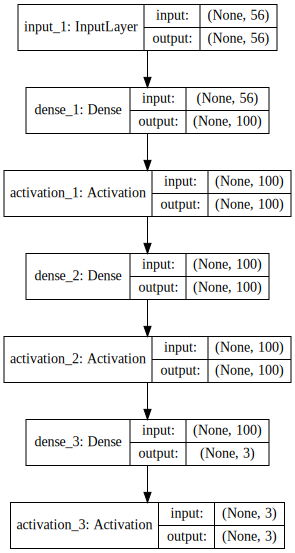

In [6]:
from keras.models import Model
from keras.layers import Input, Activation, Flatten, Dense, Concatenate
from keras.optimizers import Adam
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import keras
import pydot as pyd
from keras.utils.np_utils import to_categorical
keras.utils.vis_utils.pydot = pyd

# We first need to define the sequence of dependencies (the computational graph)
inputs = Input(shape=(columns,))
d0 = Dense(units=100)(inputs)
a0 = Activation('relu')(d0)
d1 = Dense(units=100)(a0)
a1 = Activation('relu')(d1)
d2 = Dense(units=3)(a1)

# Concatenate the convolutional features and the vector input
output = Activation('softmax')(d2)

# define a model with two inputs
model = Model(inputs=inputs, outputs=output)
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
model.summary()

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
history = model.fit(x_train, to_categorical(y_train+1), batch_size=32, epochs=20, validation_split=0.04)

Instructions for updating:
Use tf.cast instead.
Train on 19705 samples, validate on 822 samples
Epoch 1/20
19705/19705 [==============================] - 3s 139us/step - loss: 0.2101 - acc: 0.4667 - val_loss: 0.2058 - val_acc: 0.4599
Epoch 2/20
19705/19705 [==============================] - 2s 81us/step - loss: 0.2015 - acc: 0.5066 - val_loss: 0.2014 - val_acc: 0.4939
Epoch 3/20
19705/19705 [==============================] - 1s 69us/step - loss: 0.1987 - acc: 0.5135 - val_loss: 0.1999 - val_acc: 0.4915
Epoch 4/20
19705/19705 [==============================] - 1s 68us/step - loss: 0.1974 - acc: 0.5165 - val_loss: 0.1983 - val_acc: 0.5122
Epoch 5/20
19705/19705 [==============================] - 1s 64us/step - loss: 0.1962 - acc: 0.5204 - val_loss: 0.1983 - val_acc: 0.4939
Epoch 6/20
19705/19705 [==============================] - 1s 63us/step - loss: 0.1956 - acc: 0.5227 - val_loss: 0.1973 - val_acc: 0.5024
Epoch 7/20
19705/19705 [==============================] - 1s 69us/step - loss: 0.

### Let's have a look into labels of the Train, Test sets and Predictions

In [8]:
np.argmax(model.predict(x_test[:30]), axis=1)-1, y_test.values[:30]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64),
 array([ 0, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
         1, -1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1, -1], dtype=int64))

In [9]:
modelTester = ModelTester(model, x_train, y_train, x_test, y_test, bet_train, bet_test)

In [10]:
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Home win count:", (y_train==-1).sum())
print("Draw count:", (y_train==0).sum())
print("Away win count:", (y_train==1).sum())

Y train
Unique train labels: [-1  0  1]
Home win count: 9420
Draw count: 5217
Away win count: 5890


In [11]:
print("Train Prediction")
predictions = np.argmax(model.predict(x_train), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Train Prediction
Unique train labels: [-1  0  1]
Home win count: 14243
Draw count: 825
Away win count: 5459


In [12]:
modelTester.get_train_confusion_matrix()

,pred home,pred draw,pred away
true home,7897,225,1298
true draw,3459,390,1368
true away,2887,210,2793


In [13]:
print("Y test")
print("Unique train labels:", np.unique(y_test.values))
print("Home win count:", (y_test==-1).sum())
print("Draw count:", (y_test==0).sum())
print("Away win count:", (y_test==1).sum())

Y test
Unique train labels: [-1  0  1]
Home win count: 2354
Draw count: 1300
Away win count: 1478


In [14]:
print("Test Prediction")
predictions = np.argmax(model.predict(x_test), axis=1)-1
print("Unique train labels:", np.unique(predictions))
print("Home win count:", (predictions==-1).sum())
print("Draw count:", (predictions==0).sum())
print("Away win count:", (predictions==1).sum())

Test Prediction
Unique train labels: [-1  0  1]
Home win count: 3532
Draw count: 192
Away win count: 1408


In [15]:
modelTester.get_test_confusion_matrix()

,pred home,pred draw,pred away
true home,1930,70,354
true draw,879,66,355
true away,723,56,699


# TODO! Add saliency mapping here

## Betting time...

### Outcome when bet on home team
Just a sanity check. Should not see high/any yields

In [20]:
agencies = ['B365', 'BW', 'IW', 'LB', 'WH', 'SJ', 'VC', 'GB', 'BS']

In [21]:
print("Test set size", y_test.shape)

Test set size (5132,)


### Sanity checks by static betting

In [22]:
modelTester.predict_home_wins_only_profit(data="train")

Agency B365, 	win amount: -358.02
Agency BW, 	win amount: -672.98
Agency IW, 	win amount: -1066.66
Agency LB, 	win amount: -809.56
Agency WH, 	win amount: -522.30
Agency SJ, 	win amount: 413.09
Agency VC, 	win amount: -158.62
Agency GB, 	win amount: 570.80
Agency BS, 	win amount: 566.73


In [23]:
modelTester.predict_home_wins_only_profit(data="test")

Agency B365, 	win amount: -24.49
Agency BW, 	win amount: -109.16
Agency IW, 	win amount: -207.18
Agency LB, 	win amount: -137.50
Agency WH, 	win amount: -70.90
Agency SJ, 	win amount: 151.43
Agency VC, 	win amount: 28.22
Agency GB, 	win amount: 172.61
Agency BS, 	win amount: 167.05


In [24]:
modelTester.predict_draw_only_profit(data="train")

Agency B365, 	win amount: -1510.41
Agency BW, 	win amount: -1904.15
Agency IW, 	win amount: -2422.72
Agency LB, 	win amount: -2037.35
Agency WH, 	win amount: -2249.13
Agency SJ, 	win amount: -1612.36
Agency VC, 	win amount: -1259.90
Agency GB, 	win amount: -1998.52
Agency BS, 	win amount: -1916.66


In [25]:
modelTester.predict_away_wins_only_profit(data="test")

Agency B365, 	win amount: -193.12
Agency BW, 	win amount: -391.92
Agency IW, 	win amount: -544.97
Agency LB, 	win amount: -420.50
Agency WH, 	win amount: -356.55
Agency SJ, 	win amount: 283.93
Agency VC, 	win amount: -106.94
Agency GB, 	win amount: 304.80
Agency BS, 	win amount: 324.83


In [26]:
modelTester.predict_bet_home_away_profit(data="train")

Agency B365, 	win amount: -1255.44
Agency BW, 	win amount: -2308.64
Agency IW, 	win amount: -3345.15
Agency LB, 	win amount: -2503.40
Agency WH, 	win amount: -1956.18
Agency SJ, 	win amount: 1448.62
Agency VC, 	win amount: -678.29
Agency GB, 	win amount: 1651.16
Agency BS, 	win amount: 1845.30


In [27]:
modelTester.predict_bet_home_away_profit(data="test")

Agency B365, 	win amount: -217.62
Agency BW, 	win amount: -501.08
Agency IW, 	win amount: -752.15
Agency LB, 	win amount: -558.00
Agency WH, 	win amount: -427.44
Agency SJ, 	win amount: 435.37
Agency VC, 	win amount: -78.72
Agency GB, 	win amount: 477.41
Agency BS, 	win amount: 491.88


In [28]:
modelTester.predict_bet_on_all_profit(data="train")

Agency B365, 	win amount: -2765.85
Agency BW, 	win amount: -4212.79
Agency IW, 	win amount: -5767.86
Agency LB, 	win amount: -4540.75
Agency WH, 	win amount: -4205.31
Agency SJ, 	win amount: -163.74
Agency VC, 	win amount: -1938.20
Agency GB, 	win amount: -347.36
Agency BS, 	win amount: -71.36


In [29]:
modelTester.predict_bet_on_all_profit(data="test")

Agency B365, 	win amount: -621.65
Agency BW, 	win amount: -992.96
Agency IW, 	win amount: -1379.64
Agency LB, 	win amount: -1088.70
Agency WH, 	win amount: -1013.40
Agency SJ, 	win amount: 29.11
Agency VC, 	win amount: -420.18
Agency GB, 	win amount: -40.25
Agency BS, 	win amount: -6.11


### Bet on every match
Always bet on the predicted winner.

In [32]:
modelTester.always_bet_predicted_winner_profit()

Agency B365, 	win amount: 495.46
Agency BW, 	win amount: 406.71
Agency IW, 	win amount: 340.36
Agency LB, 	win amount: 385.98
Agency WH, 	win amount: 451.43
Agency SJ, 	win amount: 1191.82
Agency VC, 	win amount: 556.18
Agency GB, 	win amount: 1410.53
Agency BS, 	win amount: 1423.27


### Bet when expected return high enough
First calculate the expected return of the team expected to win. If yield is high enough, then bet. 
* yield = prediction probability * odds. 
* Bet if yield > SOMETHING.

In [34]:
modelTester.bet_predicted_winner_with_threshold_profit("test", threshold=1)

Agency B365, 	win amount: 2210.40. Didn't bet on 70.07% of matches
Agency BW, 	win amount: 2084.02. Didn't bet on 71.20% of matches
Agency IW, 	win amount: 1999.73. Didn't bet on 70.83% of matches
Agency LB, 	win amount: 2062.61. Didn't bet on 70.81% of matches
Agency WH, 	win amount: 2155.86. Didn't bet on 70.09% of matches
Agency SJ, 	win amount: 3066.74. Didn't bet on 64.36% of matches
Agency VC, 	win amount: 2281.73. Didn't bet on 69.58% of matches
Agency GB, 	win amount: 3312.22. Didn't bet on 62.22% of matches
Agency BS, 	win amount: 3336.71. Didn't bet on 62.04% of matches


### Bet on highest return
Multiplies the neural network match predictions with betting odds and from these multiplications chooses from home win, draw, away win the highest expected return value. A threshhold can be set to choose if the yield is high enough to bet.  [prediction probability * odds > SOMETHING]

In [36]:
modelTester.predict_on_highest_return(threshold=2.5)

Agency B365, 	win amount: -64.00. Didn't bet on 98.19% of matches
Agency BW, 	win amount: -38.00. Didn't bet on 98.93% of matches
Agency IW, 	win amount: -20.00. Didn't bet on 99.34% of matches
Agency LB, 	win amount: -43.00. Didn't bet on 98.81% of matches
Agency WH, 	win amount: -45.00. Didn't bet on 98.75% of matches
Agency SJ, 	win amount: -80.00. Didn't bet on 96.55% of matches
Agency VC, 	win amount: -74.00. Didn't bet on 97.90% of matches
Agency GB, 	win amount: -67.00. Didn't bet on 96.61% of matches
Agency BS, 	win amount: -82.00. Didn't bet on 96.26% of matches
